# Reading

Read the sixth and seventh chapter (pg 105-140) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **O'Neil describes the use of predictive modeling in hiring. What problems are these models attempting to solve?**
These models are being built to sort through thousands of resumes effeciantly to saving time and also feel-out a person's vibes eliminating the need for in an in-person interview. In theory eliminating in-person interviews is good as an in person interview often requires connections and has much human bias. In doing this with a model the goal was to guage a person without requiring a connection or allowing an interviewees biases to influence the hiring process while finding the perfect match fairly. In addition these models hope to predict how long a new hire will stay at the company so as to minimize the companys loss.

2. **O'Neil describes the use of predictive modeling in shift scheduling. What problems are these models attempting to solve?**
The model is trying to solve the issue of having too many employees on the clock during slow hours and too few employees on the clock during rush hours. The idea is that it both helps the company save money by not paying employees when their not needed and also not working the employees when theres no work to be done. In pracitce however this performs a little differently.

3. **What problems have these models actually solved, and which have they ended up perpetuating or creating?**

The hiring models that sifted through resumes ended up not great job-performance predictors meaning that resumes the models approved of could be not good fits or bad employees at the company. In addition this became a way to filter applications cheaply and the companies are less concerned with if they miss a certain % of good applicant as long as they didnt have to sort through all of the applications by hand and thus saving time and money. On top of this personilty tests that are supposed to identify good employees end up targeting people with mental-health issues further preventing their hiring and isolating them more. On top of this most resumes never seen for no reason other then font.  



The software used to optimize shifts minimizes the number of workers needed for effeciency and in doing so overworks and understaffs locations so it is hard to even fix as understaffing is so engrained in companies. This software attempts to minimize the number of hours it pays employees further preventing money for people living paycheck to paycheck and don't have other jobs they can turn too (thus taking advanatge of them). Irregular scheduling of shifts makes it hard to plan and protest and causing lots of stress and anxiety. The model also tries to keep hours under the amount required for health insurane to save the company more money. This means that the company is not only trying to pay the employees as little as possible but also take their health insurance.  

Both of these models are good at identifying people of groups that could use assistance both in terms of discriminated against groups, those with mental health issues and those living paycheck to paycheck. Instead of being used to help these groups it is used to identify and select against these groups.



# Dataset

A hotel would like to be able to predict which bookings will end up being canceled.

They have compiled a [dataset](http://myslu.stlawu.edu/~ltorrey/ml/Hotel.csv) of 36,275 bookings that is fairly self-explanatory.

Familiarize yourself with this dataset. Specifically:

1. **Download the data and inspect the first few rows.**
2. **Check the class balance. Which classifier(s) might handle this best?**

Looking at the distribution of each variable some have normal(ish) ditributions which could allow LDA to perform well but as not all meet this assumption a model such as KNN which makes no assumption about the data could perform better. Given that many of these predictors have the majority in one class (such as 99% havent ever canceled a reservation) the unassuming nature of KNN could prove quite beneficial.


3. **Check for missing values. What seems like the best way to handle these?**

The only missing datapoints are in the meal_plan. In the meal_plan variable there are very few data points that are not meal_plan1 so the best option would be to make all missing values the most frequent. In other words replace NaN with Meal Plan 1.

4. **Produce two plots that tell you something about the data, and explain what they tell you.**


In [15]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("http://myslu.stlawu.edu/~ltorrey/ml/Hotel.csv")
data

,booking_id,adults,children,weekend_nights,week_nights,meal_plan,reserved_parking,room_type,lead_time,market_segment,previous_cancelations,previous_stays,room_price,special_requests,canceled
0,INN00001,2,0,1,2,Meal Plan 1,No,Room Type 1,224,Offline,0,0,65.00,0,No
1,INN00002,2,0,2,3,NaN,No,Room Type 1,5,Online,0,0,106.68,1,No
2,INN00003,1,0,2,1,Meal Plan 1,No,Room Type 1,1,Online,0,0,60.00,0,Yes
3,INN00004,2,0,0,2,Meal Plan 1,No,Room Type 1,211,Online,0,0,100.00,0,Yes
4,INN00005,2,0,1,1,NaN,No,Room Type 1,48,Online,0,0,94.50,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,No,Room Type 4,85,Online,0,0,167.80,1,No
36271,INN36272,2,0,1,3,Meal Plan 1,No,Room Type 1,228,Online,0,0,90.95,2,Yes
36272,INN36273,2,0,2,6,Meal Plan 1,No,Room Type 1,148,Online,0,0,98.39,2,No
36273,INN36274,2,0,0,3,NaN,No,Room Type 1,63,Online,0,0,94.50,0,Yes


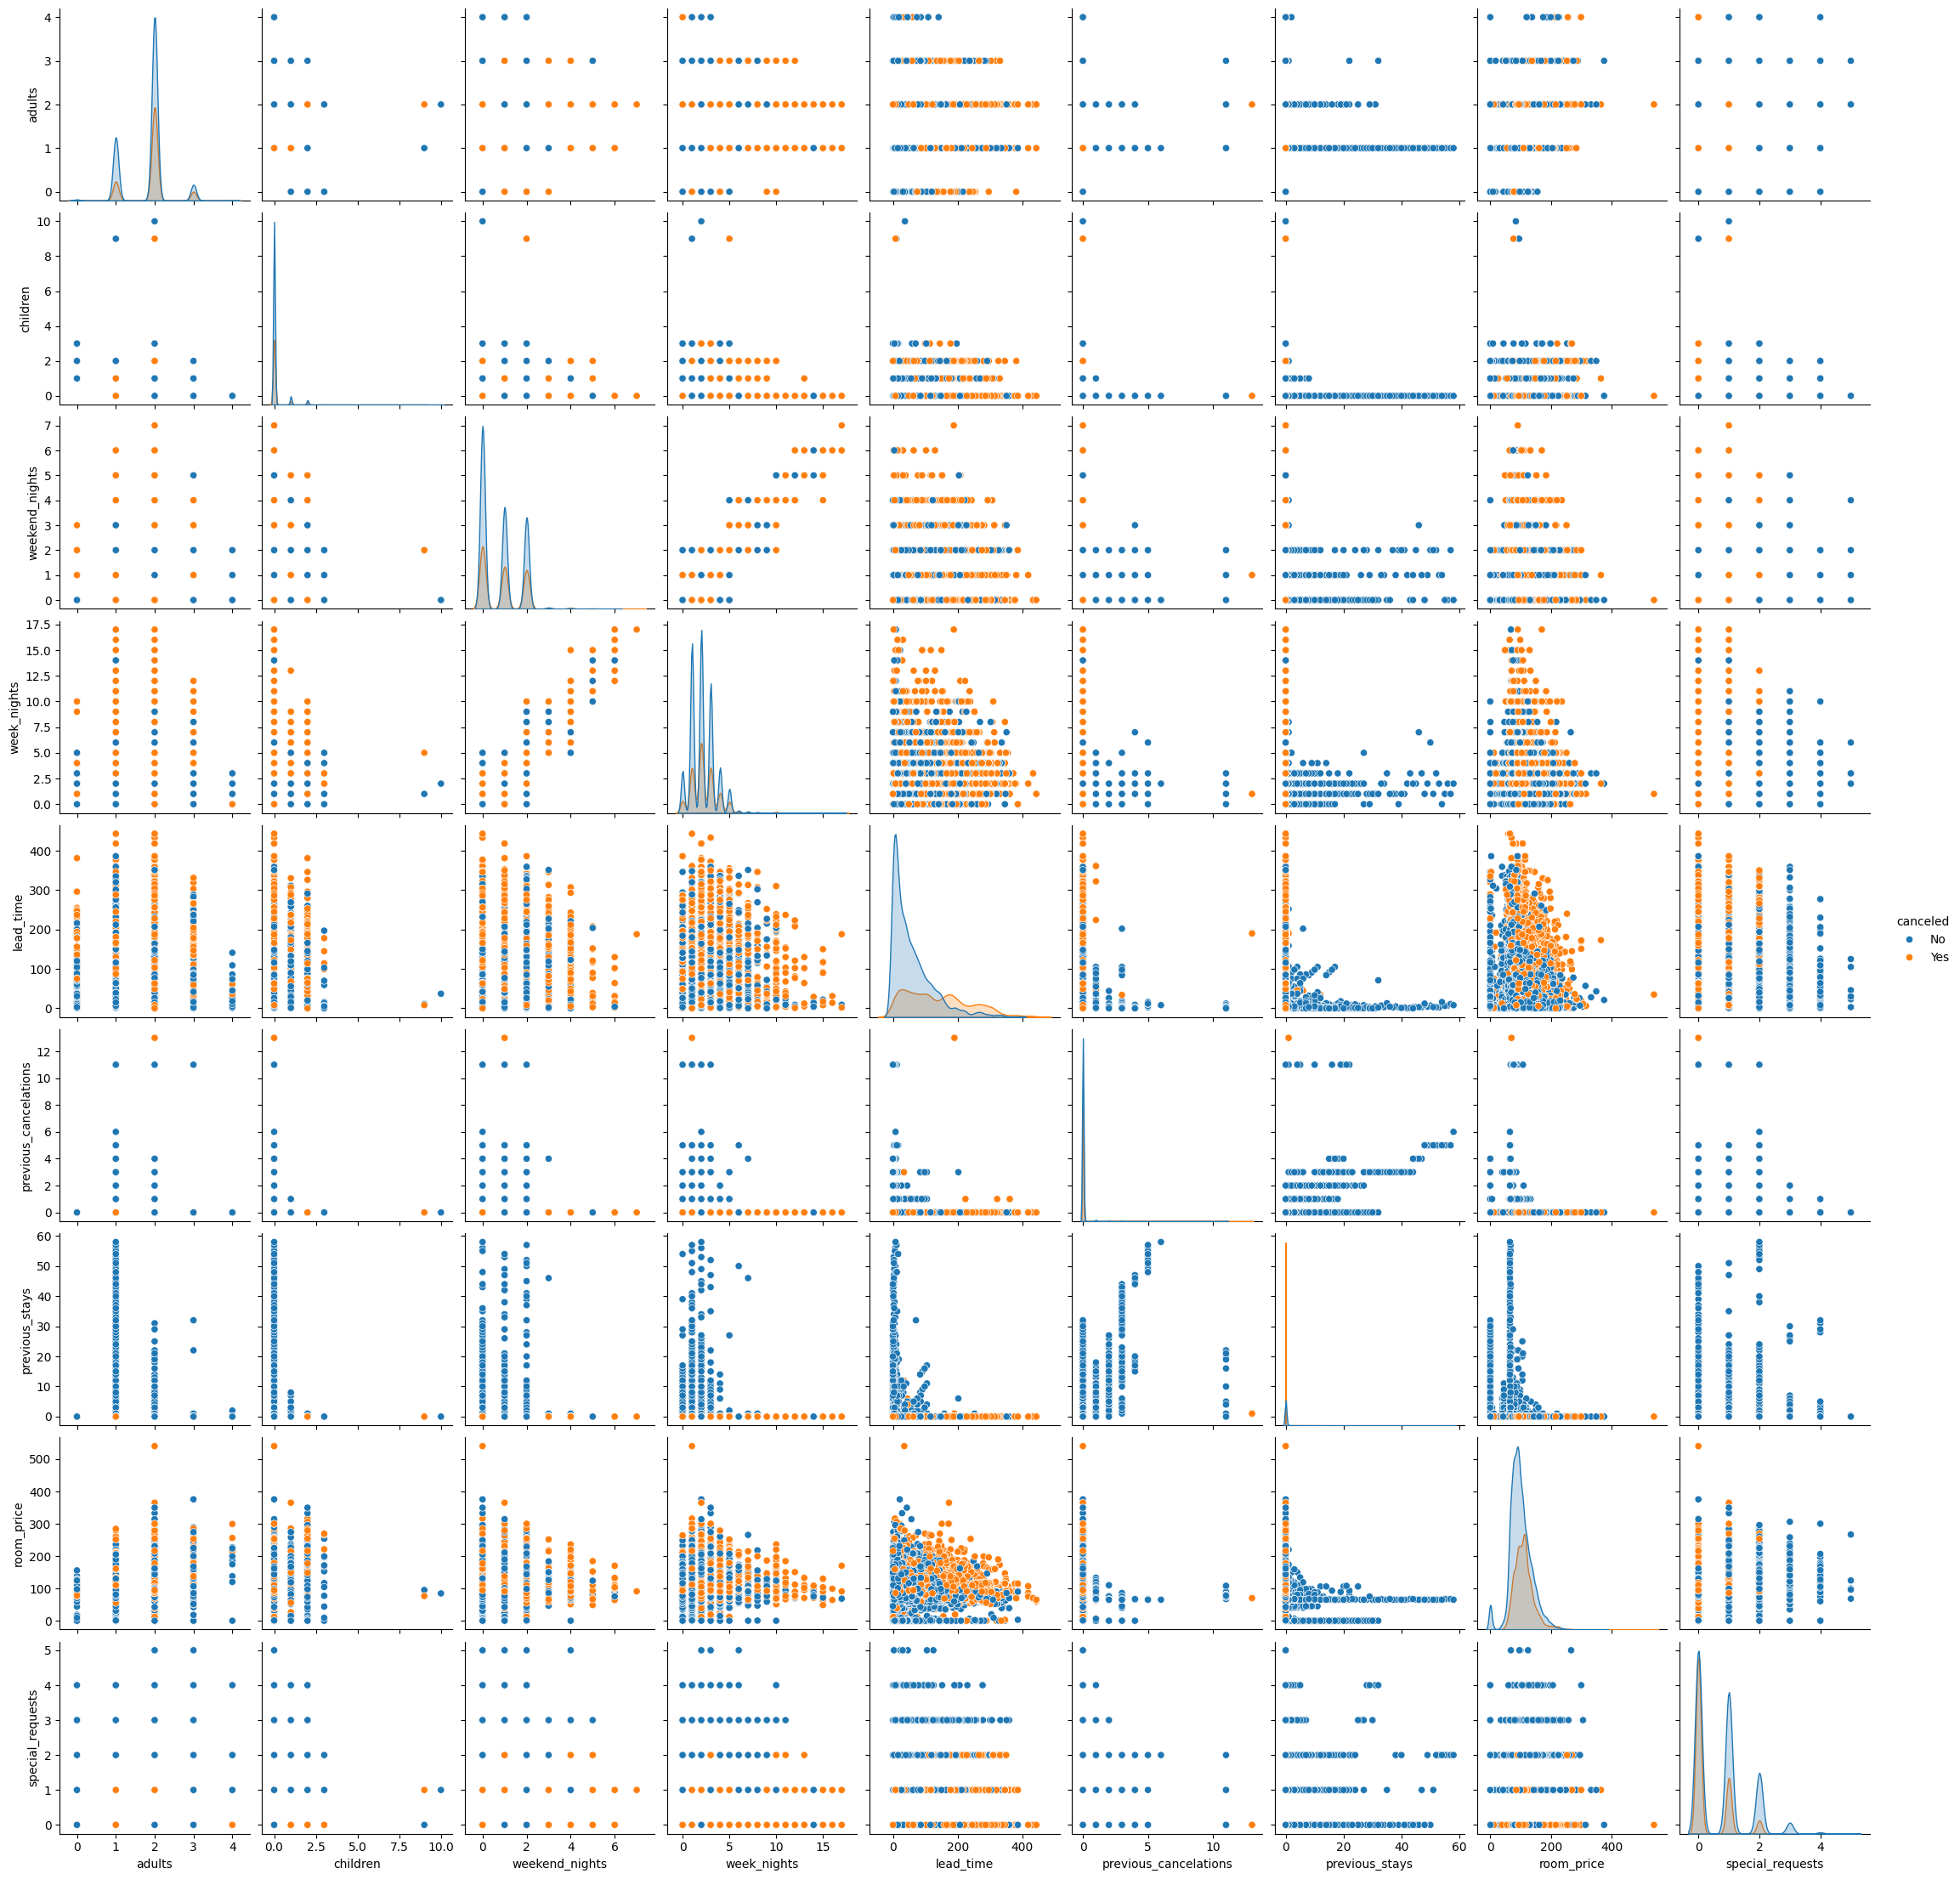

In [16]:
plot = sns.pairplot(data = data, hue = "canceled")

In [17]:
# We have 36275 data points with no null values except for in meal_plan variable where 5130 are null.
# With this in mind we are going to put the most common value AKA meal_plan1 for these points.
print(len(data))
data.isna().sum()

36275


booking_id                  0
adults                      0
children                    0
weekend_nights              0
week_nights                 0
meal_plan                5130
reserved_parking            0
room_type                   0
lead_time                   0
market_segment              0
previous_cancelations       0
previous_stays              0
room_price                  0
special_requests            0
canceled                    0
dtype: int64

In [18]:
# catagory counts
data["meal_plan"].value_counts()

Meal Plan 1    27835
Meal Plan 2     3305
Meal Plan 3        5
Name: meal_plan, dtype: int64

In [19]:
data["previous_cancelations"].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: previous_cancelations, dtype: int64

In [20]:
data["reserved_parking"].value_counts()

No     35151
Yes     1124
Name: reserved_parking, dtype: int64

In [21]:
data["adults"].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: adults, dtype: int64

<Axes: xlabel='canceled', ylabel='lead_time'>

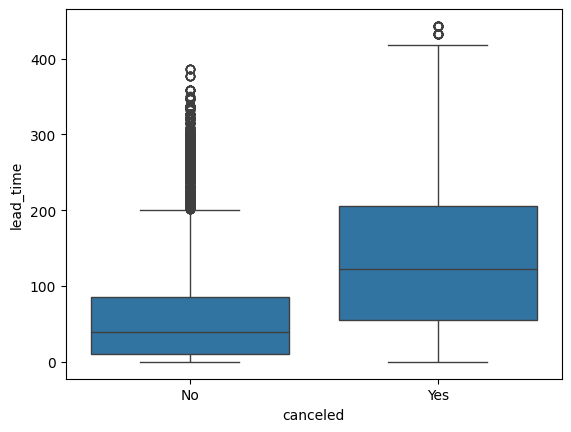

In [22]:
# 4 - Two plots that tell something about the data
sns.boxplot(data = data, y ="lead_time", x = "canceled")
# In this plot comparing lead_time and cancelations people that canceled had on average much
# higher lead times then those without. This could indicate a relationship between lead time and whether someone canceled and thus maybe a good predictor in our model.
# What this means is that people who canceled there hotel room have on average booked there rooms much farther out then those that did not cancel.

<Axes: xlabel='canceled', ylabel='room_price'>

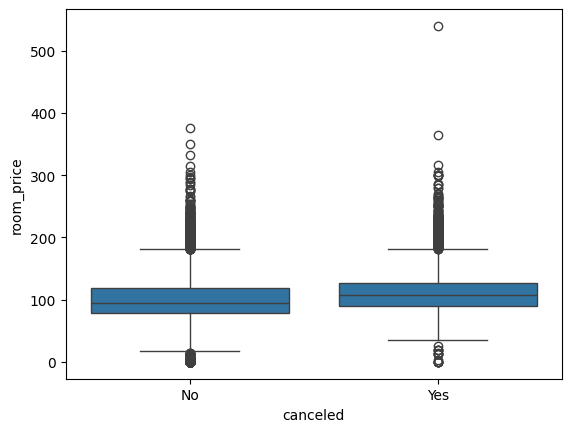

In [23]:
sns.boxplot(data = data, y ="room_price", x = "canceled")
# In this graph we can see that the room price distribution and values of those who canceled vs those who did not is very similar meaning that the typical room price
# for people who cancled is very similar to the room price of those who did not. This indicates that room price is probably not a signficant predictor for determining
# cancelations.




# Data preparation

Prepare the data for classification. Specifically:

1. **Drop any features that you don't want to use.**
2. **Arrange the data as needed by the classifiers.**

In [24]:
# Change NaN in Meal_plan to MealPlan1 most common
data['meal_plan'] = data['meal_plan'].fillna('Meal Plan 1')
data.isna().sum()

booking_id               0
adults                   0
children                 0
weekend_nights           0
week_nights              0
meal_plan                0
reserved_parking         0
room_type                0
lead_time                0
market_segment           0
previous_cancelations    0
previous_stays           0
room_price               0
special_requests         0
canceled                 0
dtype: int64

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# columnID
data = data.drop("booking_id", axis = 1)


# Seperate features and Target
x = data.drop("canceled", axis = 1)
y = data["canceled"]

# Classification

Do some initial experiments to determine which classifier(s) are promising. Specifically:

1. **Estimate the untuned accuracy of the naive Bayes, LDA, and KNN classifiers.**
2. **Which classifier does the worst? Why do you think this is?**
3. **Which classifier does the best? Why do you think this is?**



In [26]:
# Naive Bayes
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


transformer = make_column_transformer(
              (OneHotEncoder(drop="first"), ["market_segment","meal_plan", "market_segment", "room_type", "reserved_parking"]),
              remainder = "passthrough"
)

# Using all classifiers
# NB accurarcy
naive = make_pipeline(transformer,StandardScaler(), GaussianNB())
print("Naive:",cross_val_score(naive,x,y).mean())

# LDA accuracy
lda = make_pipeline(transformer, LinearDiscriminantAnalysis())
print("LDA:",cross_val_score(lda,x,y).mean())

# KNN accuracy
knn = make_pipeline(transformer, KNeighborsClassifier())
print("KNN:",cross_val_score(knn,x,y).mean())

Naive: 0.40372157133011716
LDA: 0.7953962784286699
KNN: 0.8157133011716059


Naive Bayes had the lowest untuned accuracy. This could be due to a variaty of factors such as naive bayaes assumption that classes are independent. LDA assumes that data is distributed normally which if this holds in the data could make it more accurate. In addition classes might have similar correlation directions further strengthening LDA over Naive Bayes. KNN on the other hand makes no assumptions about the data and thus can perform much better when data does is non-linear. In addition KNN requires scaling which allowed it to perform well. The KNN model performed the best because it did not make any assumptions about the data.



# Tuning

See if you can improve the best classifier through tuning. Specifically:

1. **Choose hyperparameter settings to try.**
2. **Estimate the tuned accuracy of the classifier.**
3. **Build a final model and report its hyperparameters.**

In [27]:
from sklearn.model_selection import GridSearchCV

# Parameters we want to try
hyperparameters = {
    "kneighborsclassifier__n_neighbors":[1,11,21,31,41,51,61,71],
    "kneighborsclassifier__weights":["uniform","distance"]
}
# Nested cross validation due to grid_searching cross val-ing
tuned_knn = GridSearchCV(knn, hyperparameters)
cross_val_score(tuned_knn, x, y).mean()

# Final Model using ____
final_knn = GridSearchCV(knn, hyperparameters).fit(x,y)
final_knn.best_params_

print("Final Model Parameters: ", final_knn.best_params_)

Final Model Parameters:  {'kneighborsclassifier__n_neighbors': 21, 'kneighborsclassifier__weights': 'distance'}


The best hyperparameters for this model was a KNN model with the K=21st closest neighbors using distanced weights meaning points closer are weighted more heavily.